In [43]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [14]:

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))

model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10))

In [4]:
model.compile(optimizer='adam', 
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [15]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.9739 - accuracy: 0.6579 - val_loss: 0.9598 - val_accuracy: 0.6648
Epoch 2/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8634 - accuracy: 0.6962 - val_loss: 0.9258 - val_accuracy: 0.6729
Epoch 3/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.7909 - accuracy: 0.7227 - val_loss: 0.9039 - val_accuracy: 0.6797
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7242 - accuracy: 0.7447 - val_loss: 0.8846 - val_accuracy: 0.6944
Epoch 5/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.6809 - accuracy: 0.7619 - val_loss: 0.8515 - val_accuracy: 0.7052
Epoch 6/10
1563/1563 [==============================] - 40s 26ms/step - loss: 0.6283 - accuracy: 0.7808 - val_loss: 0.8256 - val_accuracy: 0.7235
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.5873 - accuracy: 0.7927 - val_loss: 0.8842 -

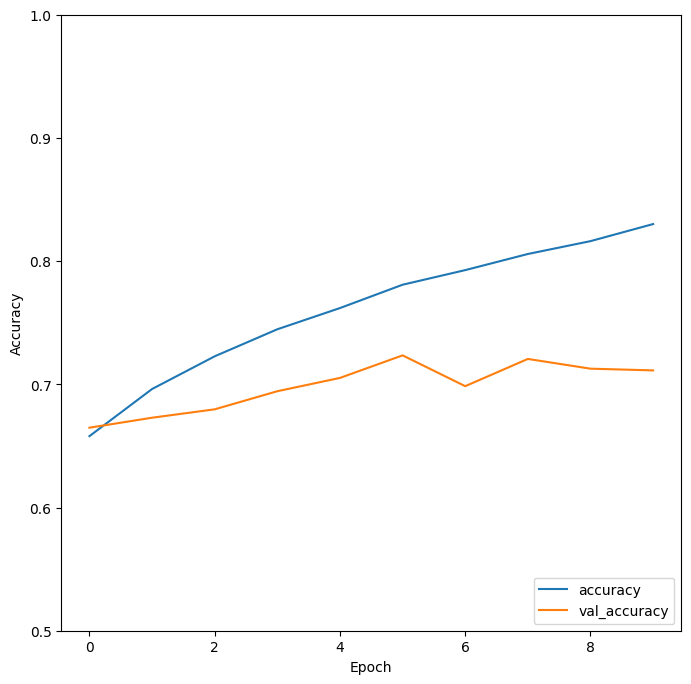

In [16]:
plt.figure(figsize=(8, 8))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

plt.savefig("output_report.png")

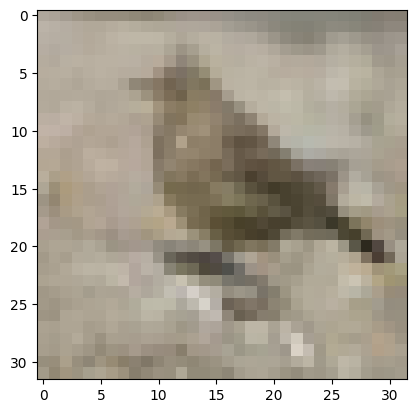

In [23]:
plt.imshow(train_images[120])

In [48]:
model.predict(np.expand_dims(test_images[0], axis=0))[0][0]

1/1 [==============================] - 0s 22ms/step


-2.6697206